# Analisis de resultados encuesta conocimiento y actitudes ante el uso del achiote

#### Cargamos librerias a utilizar

In [47]:
library("dplyr")
library("tidytext")
library("tm")
library("ggplot2")
library("stringr")

#### Leemos los archivo Csv

In [2]:
achiote1 <- read.csv("first_chunk.csv", header = FALSE)
achiote2 <- read.csv("second_chunk.csv", header = FALSE)

### Hacemos limpieza para preparar los datos

#### Borramos columnas innecesarias

In [3]:
a1_clean <- achiote1[c(-1, -2),-c(1,68)]
a2_clean <- achiote2[c(-1, -2),-c(1,68)]

#### Debido a las preguntas con múltiples respuestas, debemos combinar las columnas pertinentes

In [4]:
a1_clean$V18 <- paste(a1_clean$V18, a1_clean$V19, a1_clean$V20, a1_clean$V21, a1_clean$V22, a1_clean$V23, sep = " ")
a1_clean$V24 <- paste(a1_clean$V24, a1_clean$V25, a1_clean$V26, a1_clean$V27, a1_clean$V28, a1_clean$V29, a1_clean$V30, a1_clean$V31, a1_clean$V32, a1_clean$V33, a1_clean$V34, sep = " ")
a1_clean$V36 <- paste(a1_clean$V36, a1_clean$V37, a1_clean$V38, a1_clean$V39, a1_clean$V40, a1_clean$V41, a1_clean$V42, sep = " ")
a1_clean$V47 <- paste(a1_clean$V47, a1_clean$V48, a1_clean$V49, a1_clean$V50, a1_clean$V51, a1_clean$V52, a1_clean$V53, a1_clean$V54, a1_clean$V55, sep = " ")
a1_clean$V58 <- paste(a1_clean$V58, a1_clean$V59, a1_clean$V60, a1_clean$V61, a1_clean$V62, a1_clean$V63, a1_clean$V64, a1_clean$V65, sep = " ")

a2_clean$V18 <- paste(a2_clean$V18, a2_clean$V19, a2_clean$V20, a2_clean$V21, a2_clean$V22, a2_clean$V23, sep = " ")
a2_clean$V24 <- paste(a2_clean$V24, a2_clean$V25, a2_clean$V26, a2_clean$V27, a2_clean$V28, a2_clean$V29, a2_clean$V30, a2_clean$V31, a2_clean$V32, a2_clean$V33, a2_clean$V34, sep = " ")
a2_clean$V36 <- paste(a2_clean$V36, a2_clean$V37, a2_clean$V38, a2_clean$V39, a2_clean$V40, a2_clean$V41, a2_clean$V42, sep = " ")
a2_clean$V47 <- paste(a2_clean$V47, a2_clean$V48, a2_clean$V49, a2_clean$V50, a2_clean$V51, a2_clean$V52, a2_clean$V53, a2_clean$V54, a2_clean$V55, sep = " ")
a2_clean$V58 <- paste(a2_clean$V58, a2_clean$V59, a2_clean$V60, a2_clean$V61, a2_clean$V62, a2_clean$V63, a2_clean$V64, a2_clean$V65, sep = " ")

#### Eliminamos columnas repetidas

In [5]:
a1_clean <- subset(a1_clean, select=-c(V19,V20,V21,V22,V23,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V37,V38,V39,V40,V41,V42,V48,V49,V50,V51,V52,V53,V54,V55,V59,V60,V61,V62,V63,V64,V65))
a2_clean <- subset(a2_clean, select=-c(V19,V20,V21,V22,V23,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V37,V38,V39,V40,V41,V42,V48,V49,V50,V51,V52,V53,V54,V55,V59,V60,V61,V62,V63,V64,V65))


#### Cambiamos titulos de los data sets

In [6]:
colnames(a1_clean) <- c("Id",
                        "Ip",
                        "Acceso",
                        "Fecha_inicio",
                        "Fecha_finalizacion",
                        "Procedencia",
                        "Municipio",
                        "Edad",
                        "Sexo",
                        "Q1",
                        "Q2",
                        "Q3",
                        "Q4",
                        "Justificacion_1",
                        "He leido",
                        "Q5",
                        "Q6",
                        "Q7",
                        "Q8",
                        "Q9",
                        "Q10",
                        "Q11",
                        "Q12",
                        "Q13",
                        "Q14",
                        "Q15",
                        "Justificacion_2",
                        "Q16",
                        "Q17",
                        "Justificacion_3")
colnames(a2_clean) <- c("Id",
                        "Ip",
                        "Acceso",
                        "Fecha_inicio",
                        "Fecha_finalizacion",
                        "Procedencia",
                        "Municipio",
                        "Edad",
                        "Sexo",
                        "Q1",
                        "Q2",
                        "Q3",
                        "Q4",
                        "Justificacion_1",
                        "He leido",
                        "Q5",
                        "Q6",
                        "Q7",
                        "Q8",
                        "Q9",
                        "Q10",
                        "Q11",
                        "Q12",
                        "Q13",
                        "Q14",
                        "Q15",
                        "Justificacion_2",
                        "Q16",
                        "Q17",
                        "Justificacion_3")

#### Unimos nuestros datasets separados en uno solo

In [7]:
achiote <- rbind(a1_clean, a2_clean)

### Procedemos a eliminar caracteres bizarros de los textos de la encuesta

#### Seteamos el encoding a UTF-8 para aceptar tildes y demás caracteres

In [8]:
Encoding(achiote$Edad) <- "UTF-8"
Encoding(achiote$Municipio) <- "UTF-8"
Encoding(achiote$Q1) <- "UTF-8"
Encoding(achiote$Q6) <- "UTF-8"
Encoding(achiote$Q7) <- "UTF-8"
Encoding(achiote$Q11) <- "UTF-8"
Encoding(achiote$Q12) <- "UTF-8"
Encoding(achiote$Q13) <- "UTF-8"
Encoding(achiote$Q14) <- "UTF-8"
Encoding(achiote$Q16) <- "UTF-8"
Encoding(achiote$Justificacion_1) <- "UTF-8"
Encoding(achiote$Justificacion_2) <- "UTF-8"
Encoding(achiote$Justificacion_3) <- "UTF-8"

#### Eliminamos palabras que hacen ruido

In [9]:
achiote$Q1 <- gsub("Si, ¿cuál? ¿cómo?:", "", achiote$Q1, fixed=TRUE)
achiote$Q5 <- gsub("Si, especifique:", "", achiote$Q5, fixed=TRUE)
achiote$Q7 <- gsub("Otro::", "", achiote$Q7, fixed=TRUE)
achiote$Q12 <- gsub("Conozco otra/otras, ¿cuál/cuáles?:", "", achiote$Q12, fixed=TRUE)
achiote$Q13 <- gsub("Si, ¿cuál? ¿cómo?:", "", achiote$Q13, fixed=TRUE)

### Revisamos el producto final de la limpieza

In [10]:
head(achiote)
tail(achiote)

,Id,Ip,Acceso,Fecha_inicio,Fecha_finalizacion,Procedencia,Municipio,Edad,Sexo,Q1,...,Q10,Q11,Q12,Q13,Q14,Q15,Justificacion_2,Q16,Q17,Justificacion_3
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
3,1,190.148.209.77,Public Access,9/18/2020 11:01,9/18/2020 11:05,Casco urbano,Guatemala,15-35 años,Masculino,Manzanilla (infusión),...,Si,Raíz,Remolacha,No,Infusión o té Machacada En jugo,4,Sé que tiene propiedades curativas importantes,Aplicación local Aplicación en baños Aplicación nasal En cápsulas,5,Tiene muchas propiedades
4,2,190.106.204.56,Public Access,9/18/2020 11:22,9/18/2020 11:25,Casco urbano,Villa Canales,15-35 años,Masculino,No,...,No,Semillas,Remolacha,Azafrán,Molida,5,No lo he utilizado,En infusión,1,No lo he utilizado
5,3,190.148.44.40,Public Access,9/18/2020 11:27,9/18/2020 11:28,Casco urbano,Guatemala,15-35 años,Masculino,No,...,,,,,,,,,,
6,4,181.209.150.186,Public Access,9/18/2020 11:27,9/18/2020 11:28,Casco urbano,Guatemala,15-35 años,Femenino,No,...,,,,,,,,,,
7,5,190.56.74.149,Public Access,9/18/2020 11:33,9/18/2020 11:38,Casco urbano,Guatemala,15-35 años,Masculino,No,...,,,,,,,,,,
8,6,190.106.221.104,Public Access,9/18/2020 11:16,9/18/2020 11:41,Casco urbano,Ciudad de Guatemala,15-35 años,Masculino,Té de manzano,...,,,,,,,,,,


,Id,Ip,Acceso,Fecha_inicio,Fecha_finalizacion,Procedencia,Municipio,Edad,Sexo,Q1,...,Q10,Q11,Q12,Q13,Q14,Q15,Justificacion_2,Q16,Q17,Justificacion_3
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
291,95,181.174.106.148,Public Access,9/24/2020 11:39,9/24/2020 11:45,Casco urbano,Villa Nueva,15-35 años,Masculino,No,...,No,Raíz,Remolacha,No,No conozco ninguna preparación,5,Sería una buena alternativa para la reducción del uso de fármacos,Aplicación local En infusión En cápsulas,4,Puede que en algunos casos no reemplace a un fármaco convencional
301,96,190.148.53.147,Public Access,9/24/2020 11:45,9/24/2020 11:46,Casco urbano,Jutiapa,15-35 años,Femenino,,...,,,,,,,,,,
311,97,190.148.52.220,Public Access,9/24/2020 11:50,9/24/2020 11:54,Casco urbano,Amatitlan,15-35 años,Femenino,"Jengibre, alo verá.",...,Si,Semillas,Remolacha,Achiote,No conozco ninguna preparación,5,Seria bueno conocer acerca de sus beneficios,En infusión En cápsulas,5,Por ser una medicina natural considero que son bastante efectivos
321,98,181.209.195.80,Public Access,9/24/2020 12:06,9/24/2020 12:08,Casco urbano,Mixco,15-35 años,Femenino,No,...,,,,,,,,,,
331,99,190.148.209.11,Public Access,9/24/2020 12:09,9/24/2020 12:13,Casco urbano,Ciudad Guatemala,15-35 años,Masculino,"Infusiones de tilo, manzanilla, eucalipto",...,,,,,,,,,,
341,100,190.148.48.109,Public Access,9/24/2020 12:14,9/24/2020 12:19,Casco urbano,Guatemala,15-35 años,Femenino,"Eucalipto = ""nebulizador"", hoja de limón (dolor de estómago y de garganta así como repelente de mosquitos), jengibre (dolor de garganta, irritación e inflamación), cúrcuma (blanqueamiento dental y desinflamante), etc.",...,Si,Semillas,Azafrán,"Remolacha para ensaladas y enchiladas. Azafrán para ""colorear"" la paella.",Infusión o té Hervida Frotada Masticada,5,Estoy procurando practicar la medicina tradicional y natural.,Aplicación local Lavados Aplicación nasal En infusión,4,"No uso el achiote, pero he escuchado comentarios favorables."


#### Manejamos fechas y tiempos

In [11]:
#fechas
fecha_inicio <- as.Date(substr(achiote$Fecha_inicio, 0, 8), "%m/%d/%y")
fecha_final <- as.Date(substr(achiote$Fecha_finalizacion, 0, 8), "%m/%d/%y")
#horas minutos
hora_inicio <- as.POSIXct(substr(achiote$Fecha_inicio, 11, 15), format = "%H:%M")
hora_final <- as.POSIXct(substr(achiote$Fecha_finalizacion, 11, 15), format = "%H:%M")
#creando columnas
achiote$Fecha_inicio <- fecha_inicio
achiote$Fecha_finalizacion <- fecha_final
achiote$hora_inicio <- hora_inicio
achiote$hora_final <- hora_final
dif <- hora_final - hora_inicio
achiote$tiempo_terminar <- dif


#### Convertimos a factor los datos necesarios

In [12]:
achiote[sapply(achiote, is.character)] <- lapply(achiote[sapply(achiote, is.character)], 
                                       as.factor)
summary(achiote)

       Id                   Ip               Acceso     Fecha_inicio       
 7      : 2   181.209.150.166: 3   Public Access:101   Min.   :2020-09-18  
 1      : 1   186.151.92.15  : 3                       1st Qu.:2020-09-18  
 10     : 1   186.151.92.6   : 2                       Median :2020-09-21  
 100    : 1   190.106.221.12 : 2                       Mean   :2020-09-20  
 11     : 1   190.148.53.130 : 2                       3rd Qu.:2020-09-23  
 12     : 1   190.56.74.230  : 2                       Max.   :2020-09-24  
 (Other):94   (Other)        :87                                           
 Fecha_finalizacion         Procedencia                 Municipio 
 Min.   :2020-09-18   Casco rural :14   Guatemala            :47  
 1st Qu.:2020-09-18   Casco urbano:87   Mixco                :11  
 Median :2020-09-21                     Ciudad de Guatemala  : 5  
 Mean   :2020-09-20                     Santa Catarina Pinula: 5  
 3rd Qu.:2020-09-23                     Villa Nueva      

In [13]:
str(achiote)

'data.frame':	101 obs. of  33 variables:
 $ Id                : Factor w/ 100 levels "1","10","100",..: 1 13 24 35 46 57 68 79 90 2 ...
 $ Ip                : Factor w/ 93 levels "143.208.57.62",..: 67 45 68 11 88 47 89 55 25 60 ...
 $ Acceso            : Factor w/ 1 level "Public Access": 1 1 1 1 1 1 1 1 1 1 ...
 $ Fecha_inicio      : Date, format: "2020-09-18" "2020-09-18" ...
 $ Fecha_finalizacion: Date, format: "2020-09-18" "2020-09-18" ...
 $ Procedencia       : Factor w/ 2 levels "Casco rural",..: 2 2 2 2 2 2 2 2 1 2 ...
 $ Municipio         : Factor w/ 29 levels "Amatitlan","Asunción Mita",..: 13 28 13 13 13 5 13 13 13 13 ...
 $ Edad              : Factor w/ 3 levels "15-35 años","36-55 años",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Sexo              : Factor w/ 2 levels "Femenino","Masculino": 2 2 2 1 2 2 2 2 2 1 ...
 $ Q1                : Factor w/ 61 levels "","\"Mata ratón\", se cocina y con esa agua se da un baño para bajar la fiebre",..: 28 38 38 38 38 56 38 38 9 51 ...
 $ Q2       

## Resultados

#### colores para graficas

In [14]:
color.function <- colorRampPalette(c("#FFFFFF" , "#45094f" ))
color.ramp <- color.function(n = 10)

#### Procedencia


 Casco rural Casco urbano 
          14           87 

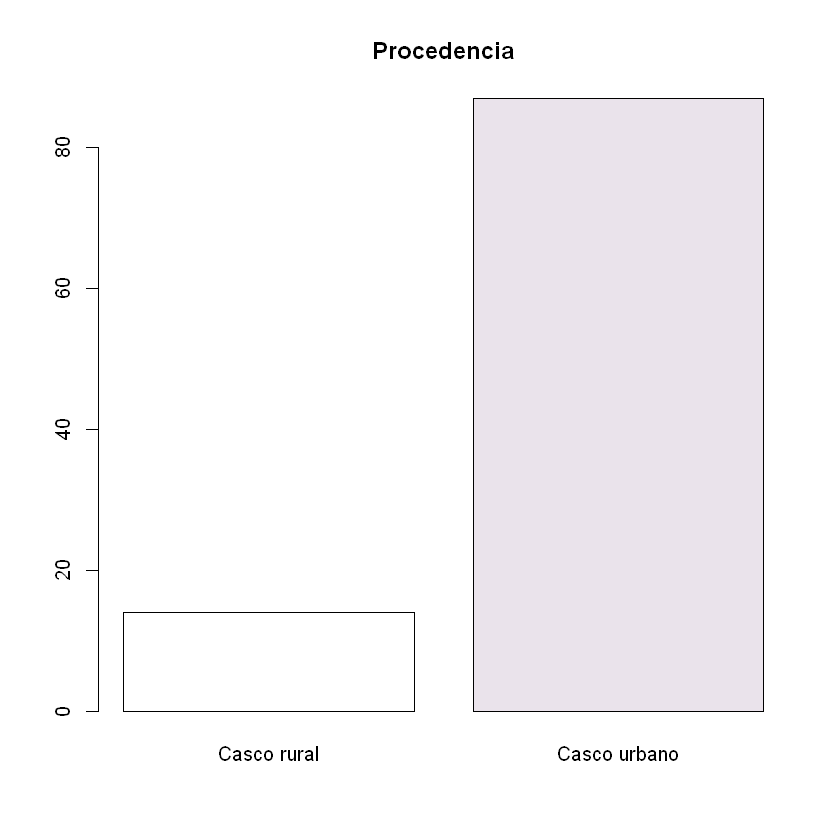

In [15]:
info <- table(achiote$Procedencia)
xx <- barplot(info,main="Procedencia", col=color.ramp)
info

#### Municipio


             Amatitlan          Asunción Mita             Chiquimula 
                     1                      2                      2 
          Ciudad Vieja             Coatepeque                  Cobán 
                     1                      1                      1 
             Fraijanes              Guatemala                 Izabal 
                     2                     57                      1 
               Jutiapa            Mazatenango                  Mixco 
                     2                      1                     11 
San Lucas Sacatepéquez      San Miguel Petapa       Santa Ana, Peten 
                     3                      1                      1 
 Santa Catarina Pinula          Villa canales            Villa Nueva 
                     7                      4                      3 

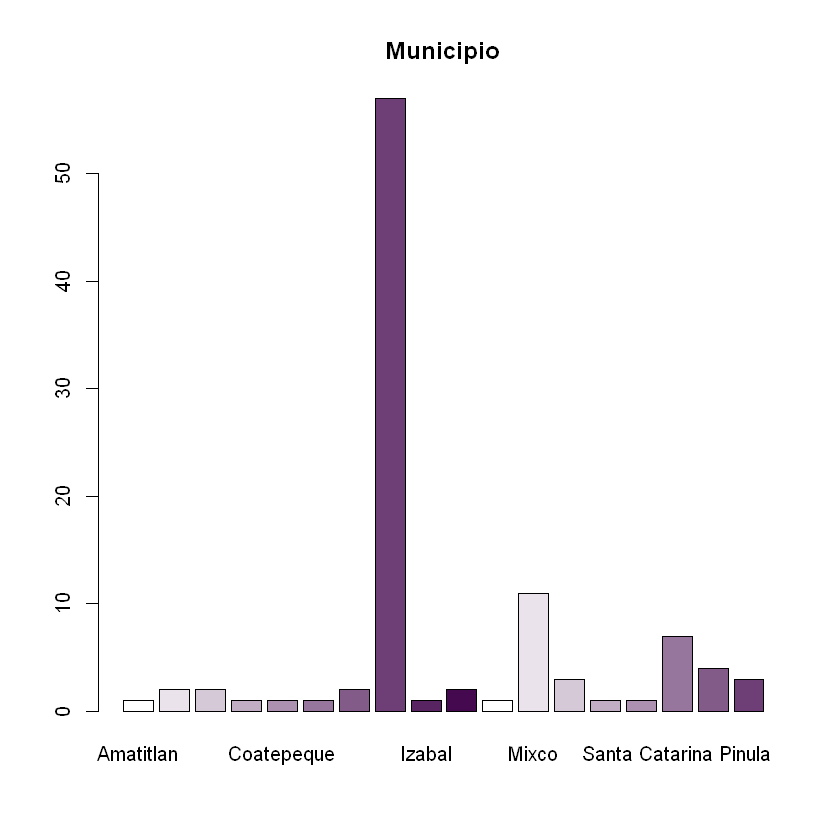

In [16]:
achiote$Municipio[achiote$Municipio == 'Ciudad'] <- 'Guatemala'
achiote$Municipio[achiote$Municipio == 'Ciudad de Guatemala'] <- 'Guatemala'
achiote$Municipio[achiote$Municipio == 'GUATEMALA'] <- 'Guatemala'
achiote$Municipio[achiote$Municipio == 'guatemala'] <- 'Guatemala'
achiote$Municipio[achiote$Municipio == 'Ciudad Guatemala'] <- 'Guatemala'
achiote$Municipio[achiote$Municipio == 'En Asunción Mita Jutiapa'] <- 'Asunción Mita'
achiote$Municipio[achiote$Municipio == 'Guatemala, Fraijanes'] <- 'Fraijanes'
achiote$Municipio[achiote$Municipio == 'Sta Catarina Pinula'] <- 'Santa Catarina Pinula'
achiote$Municipio[achiote$Municipio == 'Sta. Catarina Pinula'] <- 'Santa Catarina Pinula'
achiote$Municipio[achiote$Municipio == 'Villa Canales'] <- 'Villa canales'
achiote$Municipio[achiote$Municipio == 'Sacatepéquez'] <- 'San Lucas Sacatepéquez'
achiote$Municipio <- droplevels(achiote$Municipio)
info <- table(achiote$Municipio)
xx <- barplot(info,main="Municipio", col=color.ramp, cex.lab=2)
info

#### Edad


15-35 años 36-55 años 56-75 años 
        85          4         12 

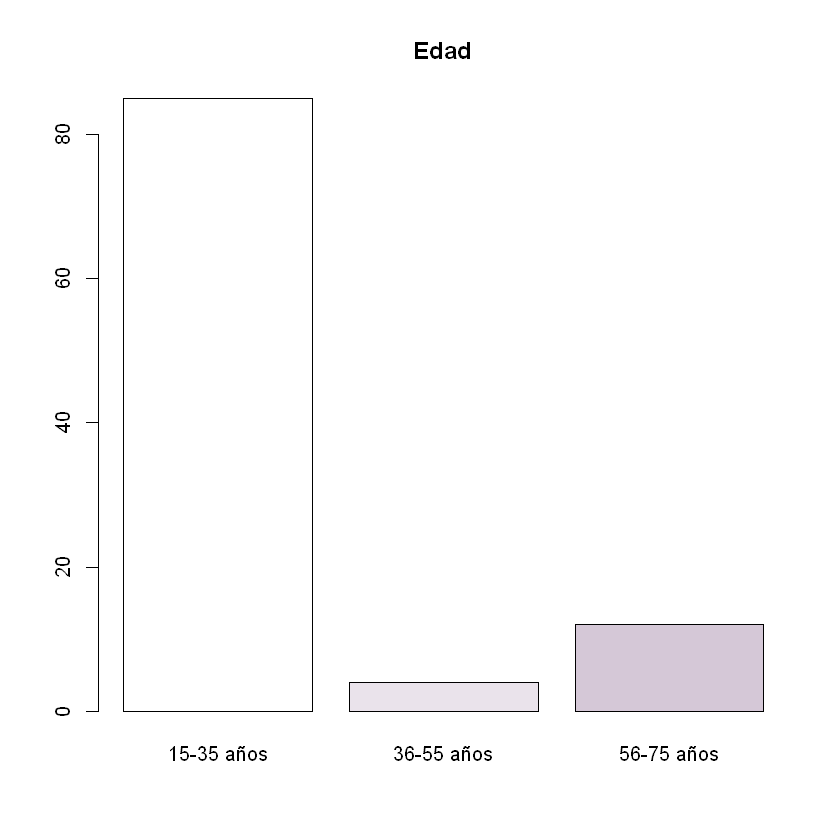

In [17]:
info <- table(achiote$Edad)
xx <- barplot(info,main="Edad", col=color.ramp, cex.lab=2)
info

#### Sexo


 Femenino Masculino 
       61        40 

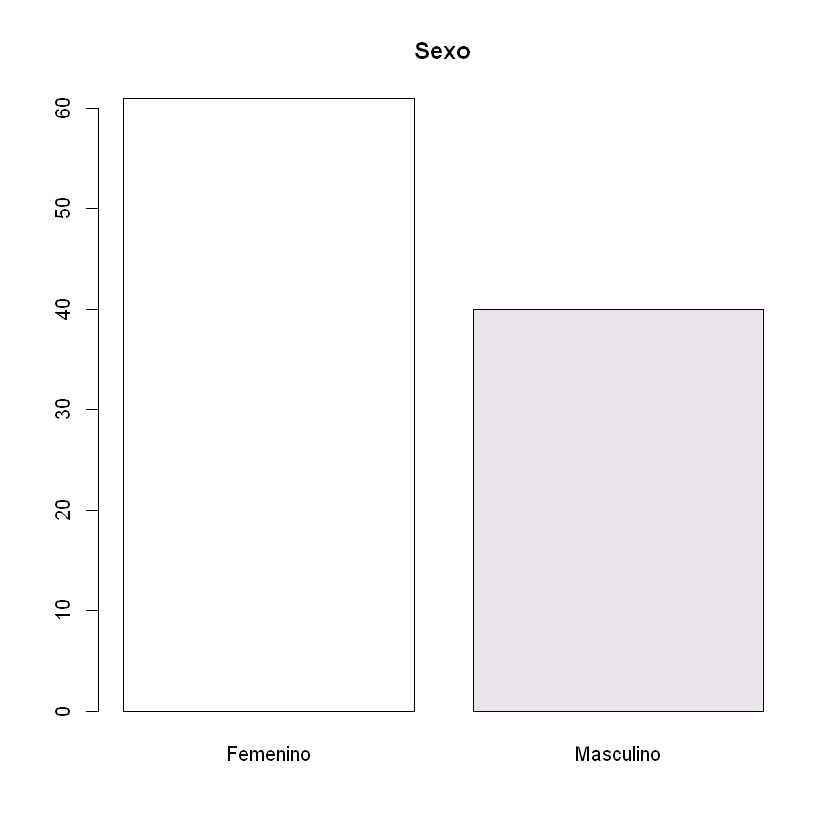

In [18]:
info <- table(achiote$Sexo)
xx <- barplot(info,main="Sexo", col=color.ramp, cex.lab=2)
info

#### ¿Ha utilizado usted alguna planta para tratar alguna enfermedad/afeccion?

Joining, by = "word"



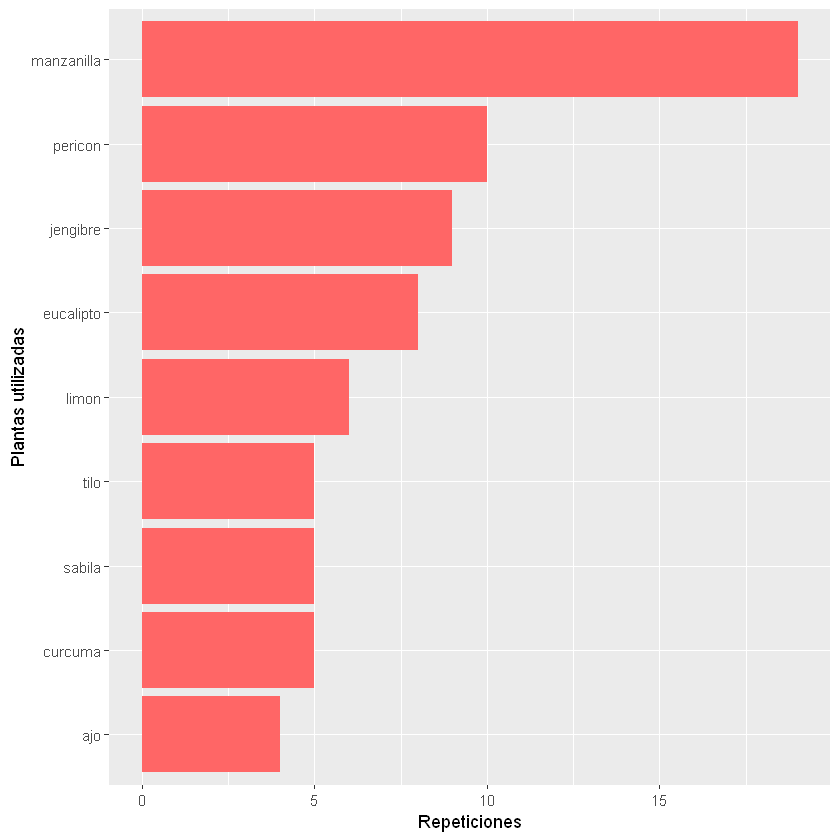

In [19]:
text <- toupper(as.character(levels(achiote$Q1)))
text <- chartr("ÁÉÍÓÚ", "AEIOU", text)
text_df <- tibble(line = 1:61, text = text)

custom_stop_words <- bind_rows(stop_words,
                               tibble(word = c(tm::stopwords("spanish"), "dolor", "estomago", "infusion", "colicos"),
                                          lexicon = "custom"))

text_df <- text_df %>% 
    unnest_tokens(word, text) %>%
    anti_join(custom_stop_words) %>%
    count(word, sort = TRUE)


text_df %>%
  filter(n > 3) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n)) +
  geom_col() +
  geom_bar(stat="identity", fill = "#FF6666") +
  labs(x = "Plantas utilizadas", y = "Repeticiones") +
  coord_flip()

#### ¿Conoce usted el achiote?


No Si 
34 67 

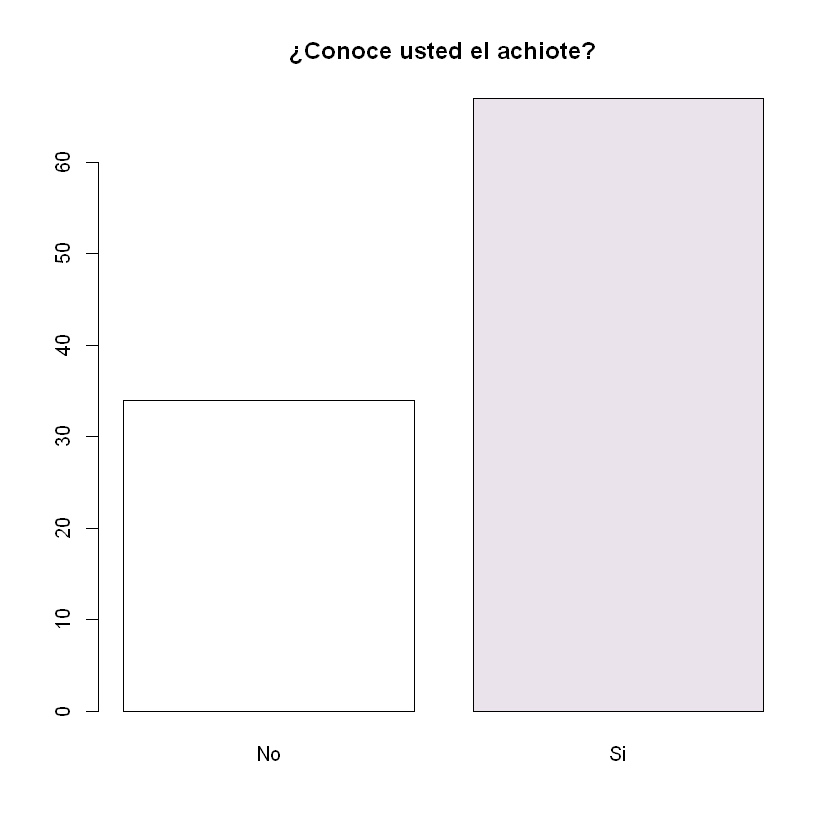

In [20]:
info <- table(achiote$Q2)
xx <- barplot(info,main="¿Conoce usted el achiote?", col=color.ramp, cex.lab=2)
info

#### ¿Estaría dispuesto a conocer más sobre los usos ancestrales del achiote?


No Si 
 2 32 

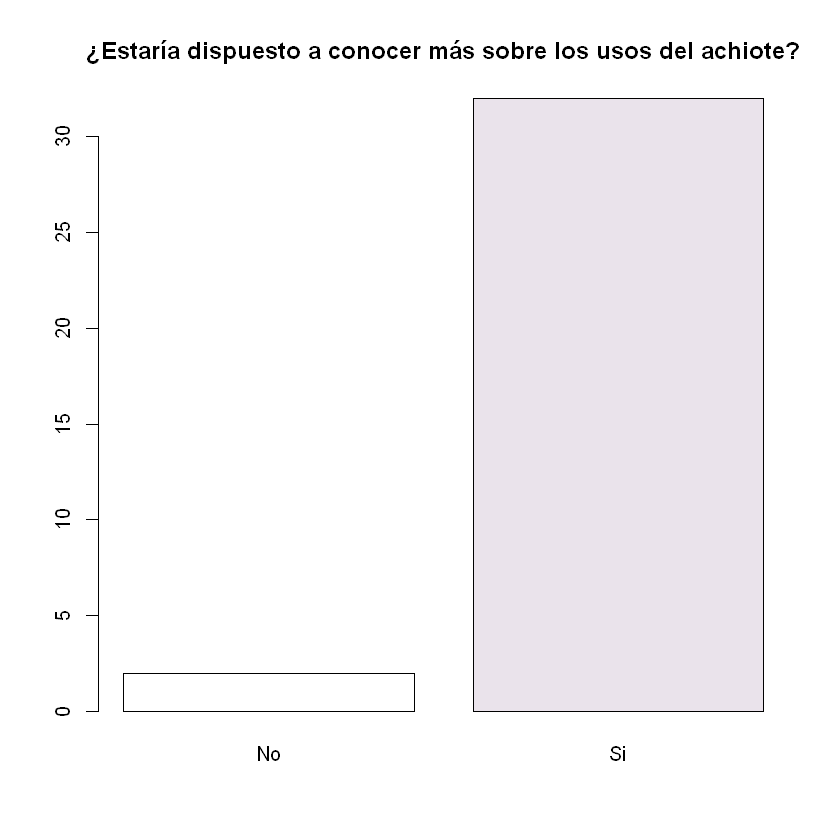

In [21]:
temp <- as.character(achiote$Q3)
si <- grep("Si", temp, value = TRUE)
no <- grep("No", temp, value = TRUE) 
info <- table(c(si, no))
xx <- barplot(info,main="¿Estaría dispuesto a conocer más sobre los usos del achiote?", col=color.ramp, cex.lab=2)
info

#### ¿Qué tan efectivo cree usted que son los tratamientos alternativos de achiote?

[1] "1 - No produce ningun efecto"
[1] "2 - El efecto no es notable"
[1] "3 - Levemente efectivo"
[1] "4 - Efecto notable"
[1] "5 - Efecto significativo"



 1  2  3  4  5 
 3  2 13 14  2 

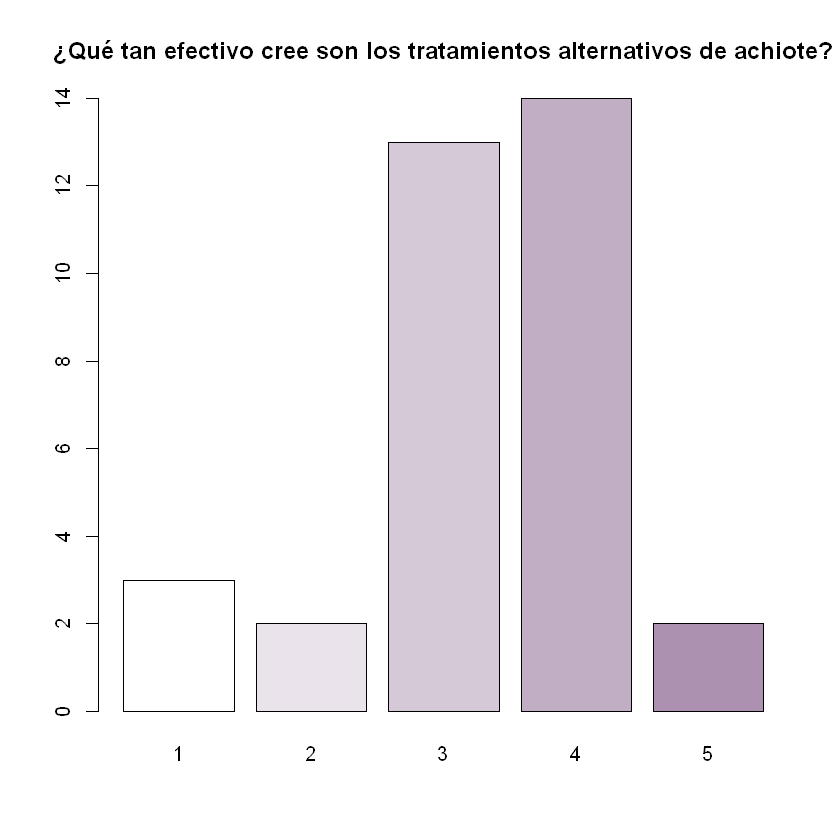

In [22]:
temp <- as.character(achiote$Q4)
uno <- grep(1, temp, value = TRUE)
dos <- grep(2, temp, value = TRUE) 
tres <- grep(3, temp, value = TRUE) 
cuatro <- grep(4, temp, value = TRUE) 
cinco <- grep(5, temp, value = TRUE) 
info <- table(c(uno, dos, tres, cuatro, cinco))
print("1 - No produce ningun efecto")
print("2 - El efecto no es notable")
print("3 - Levemente efectivo")
print("4 - Efecto notable")
print("5 - Efecto significativo")
xx <- barplot(info,main="¿Qué tan efectivo cree son los tratamientos alternativos de achiote?", col=color.ramp, cex.lab=2)
info

#### Justificación de nivel de creencia

In [34]:
text <- toupper(as.character(levels(achiote$Justificacion_1)))
text <- chartr("ÁÉÍÓÚ", "AEIOU", text)
text_df <- tibble(text = text)

custom_stop_words <- bind_rows(stop_words,
                               tibble(word = c(tm::stopwords("spanish"), "dolor", "estomago", "infusion", "colicos"),
                                          lexicon = "custom"))

text_df %>% 
     unnest_tokens(ngram, text, token = "ngrams", n = 2) %>%
     count(ngram, sort = TRUE)

ngram,n
<chr>,<int>
no conozco,3
no se,3
achiote pero,2
con propiedades,2
confio en,2
conocimiento de,2
considero que,2
de los,2
debe ser,2


#### ¿Conoce usted otro nombre para el achiote?

In [83]:
info <- table(achiote$Q5)
xx <- barplot(as.matrix(info[,-1]),main="¿Conoce usted otro nombre para el achiote?", col=color.ramp, cex.lab=2)
info

ERROR: Error in `[.default`(info, , -1): número incorreto de dimensiones


#### ¿Qué usos ha oido usted del achiote? ¿cuales usos le ha dado usted al achiote?

word,n
<chr>,<int>
culinario,60
tinte,41
medicinal,21
cosmetico,10


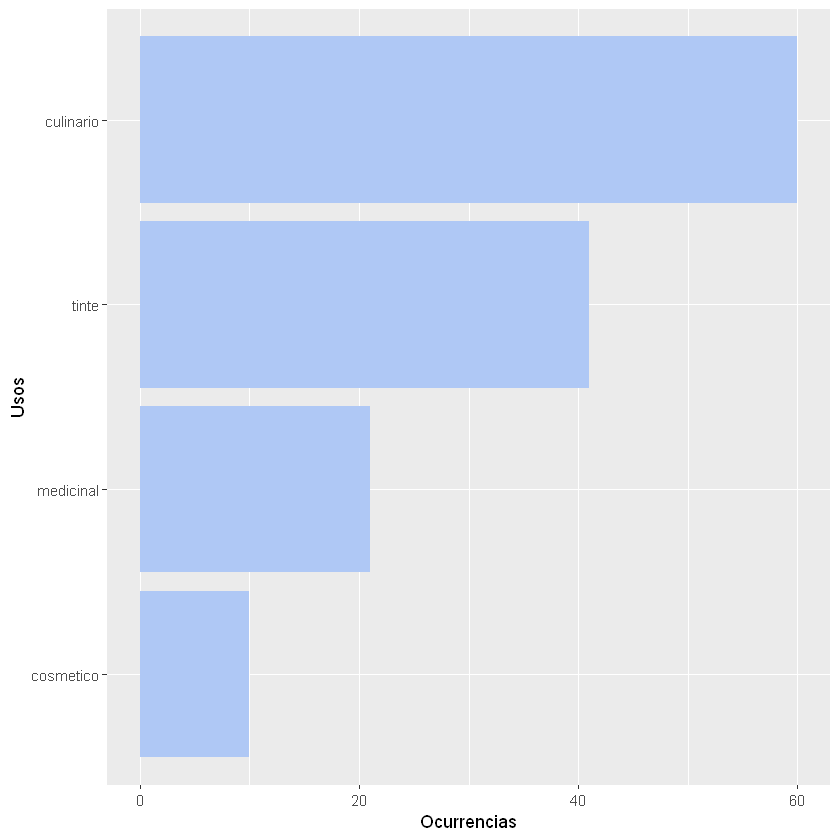

In [106]:
text <- toupper(as.character(achiote$Q6))
text <- chartr("ÁÉÍÓÚ", "AEIOU", text)
text_df <- tibble(text = text)

text_df <- text_df %>% 
    unnest_tokens(word, text) %>%
    count(word, sort = TRUE)

text_df %>%
  filter(n > 1) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n)) +
  geom_col() +
  geom_bar(stat="identity", fill = "#AFC8F5") +
  labs(x = "Usos", y = "Ocurrencias") +
  coord_flip()

text_df

#### Conoce como aplicaciones del achiote

Joining, by = "word"



word,n
<chr>,<int>
colorante,78
bebidas,61
comidas,61
textiles,44
tinte,44
pintalabios,16
alivio,10
fiebre,6
leche,5


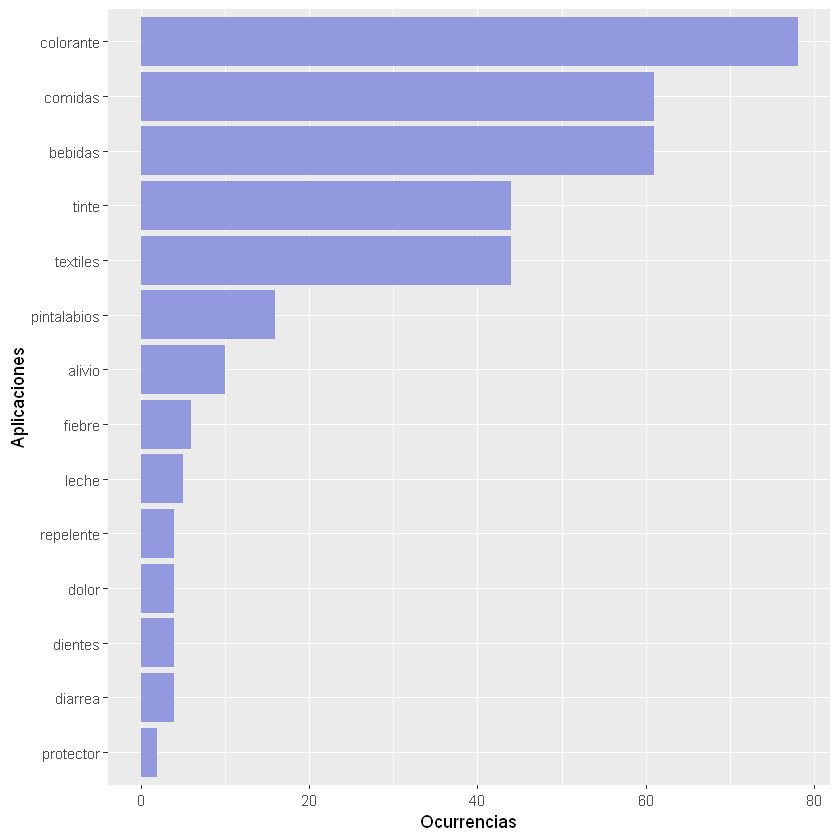

In [81]:
text <- toupper(as.character(achiote$Q7))
text <- chartr("ÁÉÍÓÚ", "AEIOU", text)
text_df <- tibble(text = text)

custom_stop_words <- bind_rows(stop_words,
                               tibble(word = c(tm::stopwords("spanish"), "quita", "aumenta", "materna", "flujo", "achiote", "aplicacion", "conozco", "consumo", "control", "solar", "mosquitos"),
                                          lexicon = "custom"))

text_df <- text_df %>% 
    unnest_tokens(word, text) %>%
    anti_join(custom_stop_words) %>%
    count(word, sort = TRUE)

text_df %>%
  filter(n > 1) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n)) +
  geom_col() +
  geom_bar(stat="identity", fill = "#9299DE") +
  labs(x = "Aplicaciones", y = "Ocurrencias") +
  coord_flip()

text_df

#### ¿Con qué frecuencia utiliza el achiote en cualquiera de sus presentaciones?


                                   Mensualmente           No lo utilizo 
                     34                      14                      19 
           Semanalmente Una vez cada seis meses 
                      5                      29 

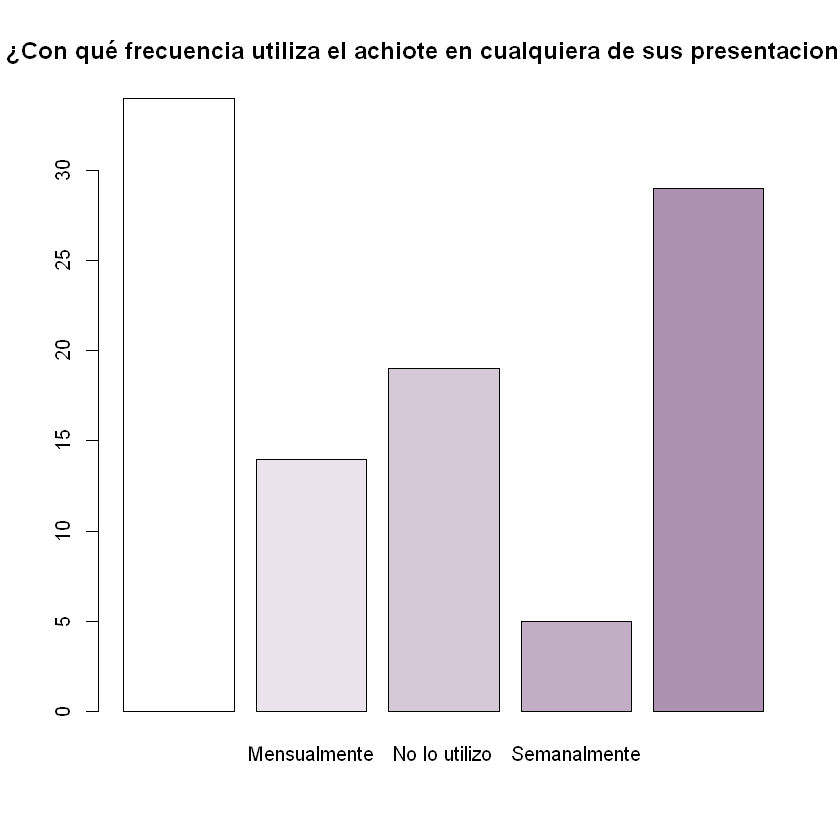

In [104]:
info <- table(achiote$Q8)
xx <- barplot(info,main="¿Con qué frecuencia utiliza el achiote en cualquiera de sus presentaciones?", col=color.ramp, cex.lab=2)
info

#### ¿Cómo obtiene usted el achiote?

Joining, by = "word"



word,n
<chr>,<int>
mercado,45
supermercado,20
tienda,16
achiote,11
obtengo,11
compro,1
distribuidor,1
personal,1
producciã,1


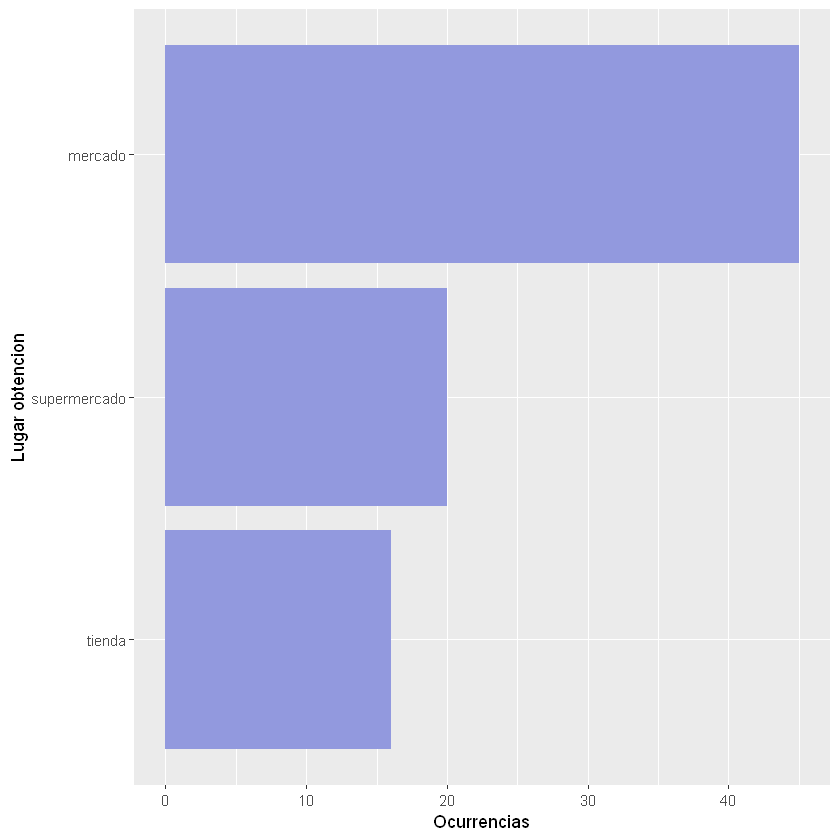

In [111]:
text <- toupper(as.character(achiote$Q9))
text <- chartr("ÁÉÍÓÚ", "AEIOU", text)
text_df <- tibble(text = text)

custom_stop_words <- bind_rows(stop_words,
                               tibble(word = c(tm::stopwords("spanish"), "conveniencia"),
                                          lexicon = "custom"))

text_df <- text_df %>% 
    unnest_tokens(word, text) %>%
    anti_join(custom_stop_words) %>%
    count(word, sort = TRUE)

text_df %>%
  filter(n > 11) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n)) +
  geom_col() +
  geom_bar(stat="identity", fill = "#9299DE") +
  labs(x = "Lugar obtencion", y = "Ocurrencias") +
  coord_flip()

text_df

#### tiempos de finalización de la encuesta

In [ ]:
#encuesta más rápida
min(achiote$tiempo_terminar)

#promedio tiempo de finalización
mean(achiote$tiempo_terminar)

#Encuesta más tardada
max(achiote$tiempo_terminar)